<div align=center>

<p></p>
<p></p>
<font size=5>
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Machine Learning - Dr. Fatemeh Seyyedsalehi
</font>
<br/>
<br/>
Winter 2024

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Assignment 2 - Q5
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  April the fifth


<br/>
<br/>
<b>

Kian Izadpanah 400104783
<b/>
                <br/><br/><br/>
                <font color=red>
     </font>
</font>
                <br/>
    </div>



# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /kaggle/working/HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-03-22 13:35:39--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4e61e58e70f23bd3ad6b1e26ce.dl.dropboxusercontent.com/cd/0/inline/CPn69C9eHL4noeOpkNe8D-iq3rq1pFIitL5Sv2ad7lRrOteErdaWYMS614V-nMk2AmukV9sRV2mwyDVycHGCWWVzqSVo7H59nBjS_9-v-UUJL3yu-LBb8i97Wef_Ryj5O9kIFVnjtb0Y2wWbrJ_WM7b8/file# [following]
--2024-03-22 13:35:40--  https://uc4e61e58e70f23bd3ad6b1e26ce.dl.dropboxusercontent.com/cd/0/inline/CPn69C9eHL4noeOpkNe8D-iq3rq1pFIitL5Sv2ad7lRrOteErdaWYMS614V-nMk2AmukV9sRV2mwyDVycHGCWWVzqSVo7H59nBjS_9-v-UUJL3yu-LBb8i97Wef_Ryj5O9kIFVnjtb0Y2wWbrJ_WM7b8/file
Resolving uc4e61e58e70f23bd3ad6b1e26ce.dl.dropboxusercontent.com (uc4e61e58e70f23bd3ad6b1e26ce.dl.dropboxusercontent.com)... 162.125.65.15, 26

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [2]:
file_path = '/kaggle/working/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
df = pd.read_csv(file_path)
print(df[:5])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


Get a brief description of the dataset

columns are:

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
counts of missing values in each column are:

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

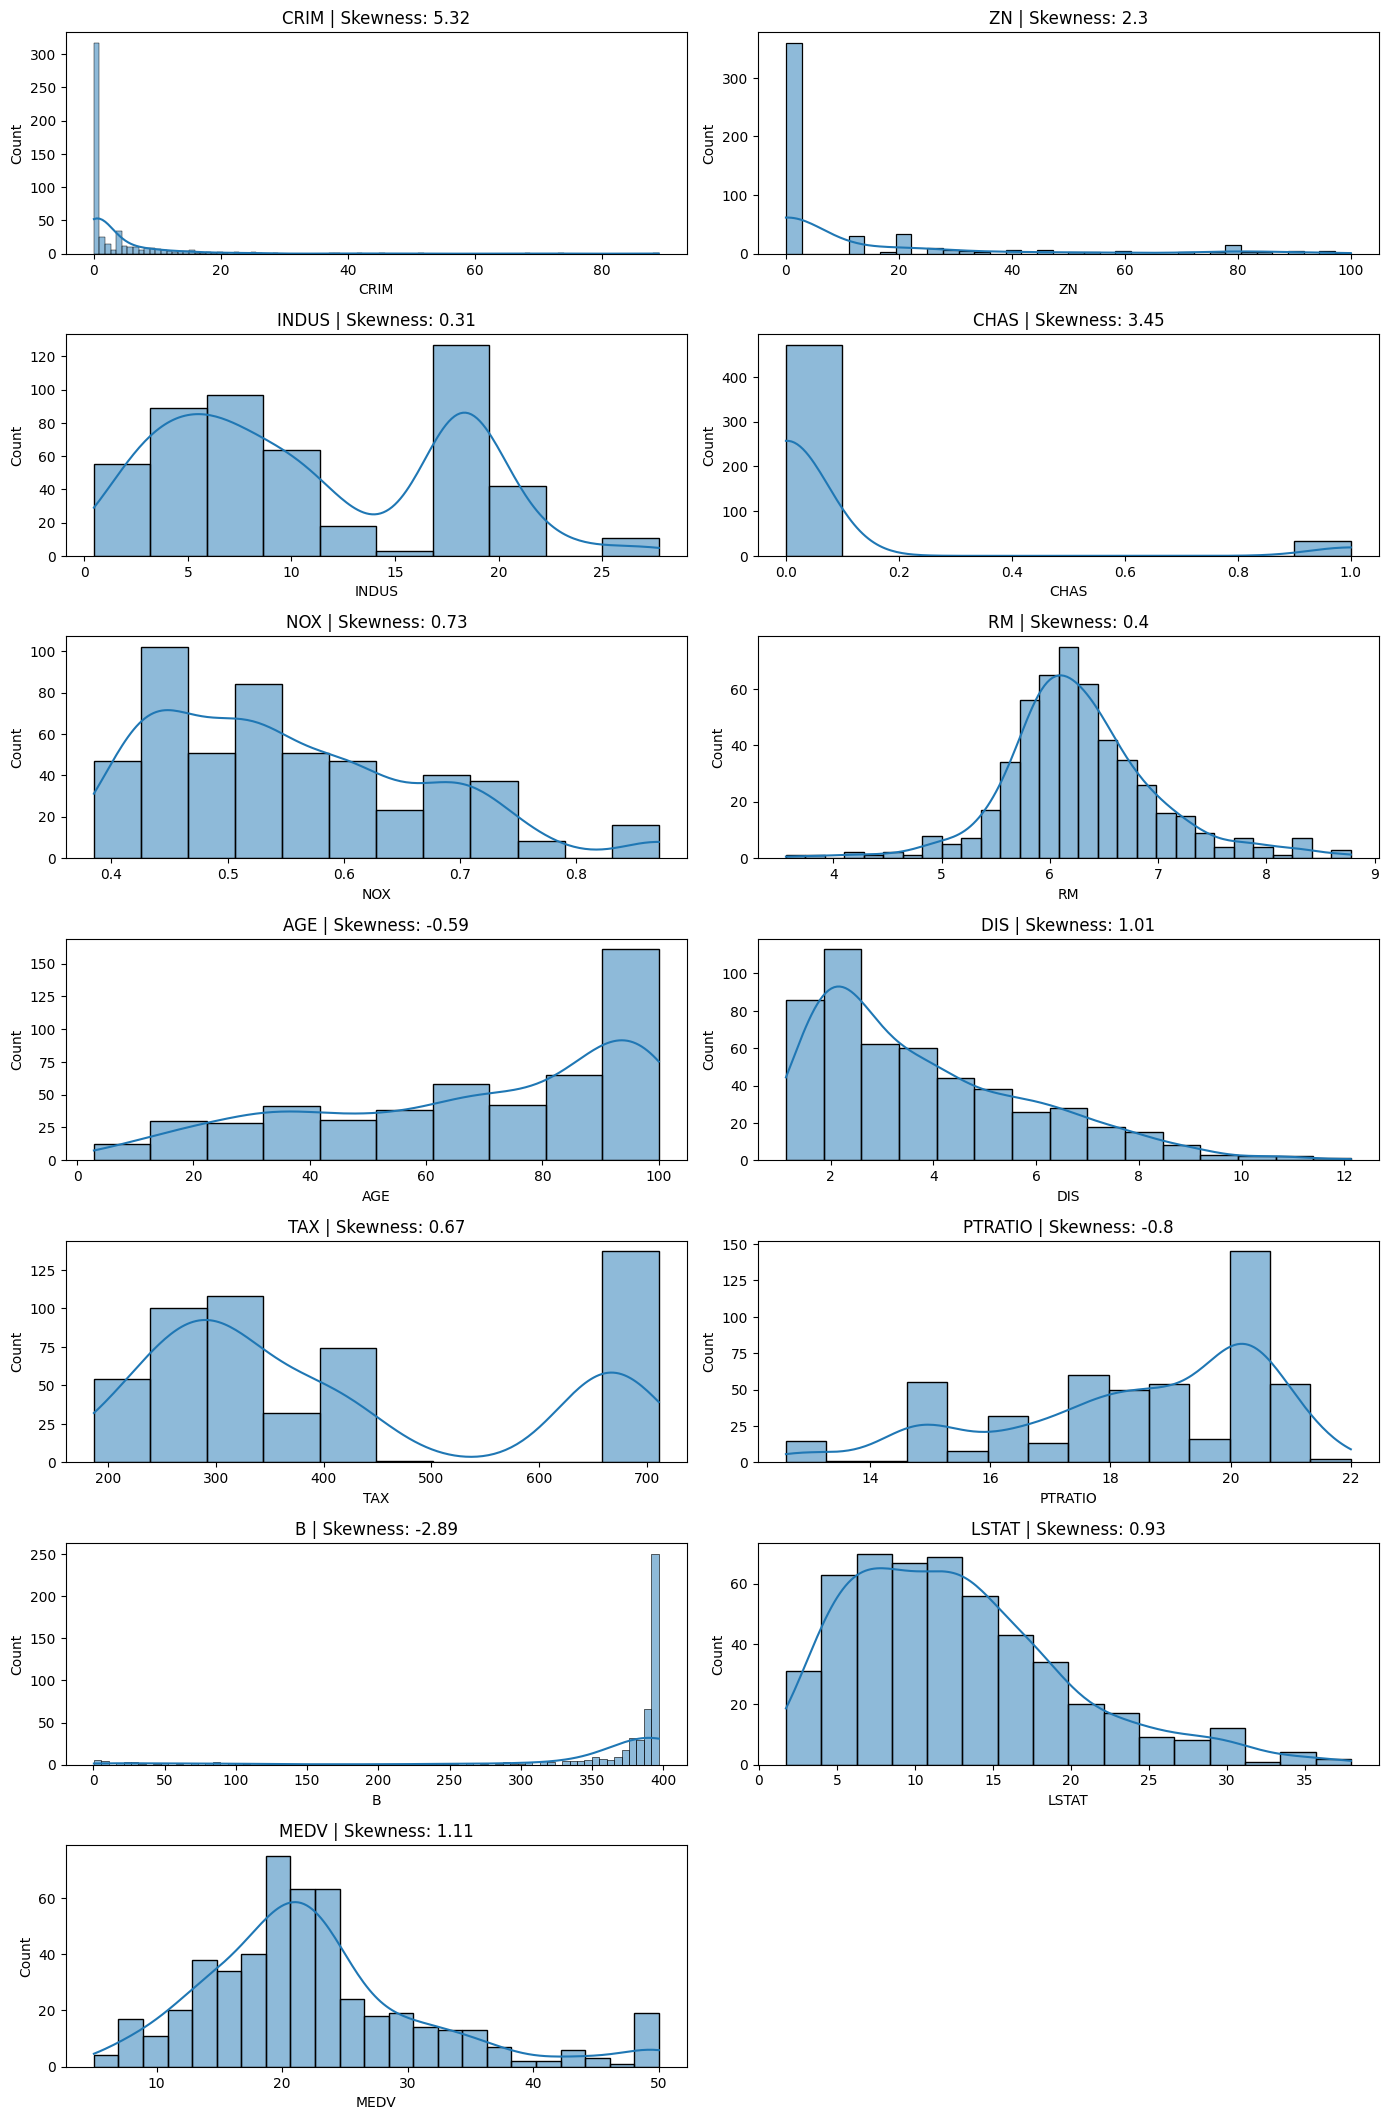

In [ ]:
# TODO: you can use .info() and .description()
# TODO
print("columns are:\n")
print(df.columns.tolist())
print("=========================================================================================")
print("=========================================================================================")
print("info:\n")
print(df.info())
print("=========================================================================================")
print("=========================================================================================")
print("counts of missing values in each column are:\n")
print(df.isnull().sum())
print("=========================================================================================")
print("=========================================================================================")
print("descriptions of the data:\n")
print(df.describe())
print("=========================================================================================")
print("=========================================================================================")
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for index, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, index)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    
plt.tight_layout()
plt.show()

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [5]:
# TODO: drop MEDV and convert to numpy array
dropped_df = df.drop(['MEDV'], axis=1)
np_dropped_df = df.to_numpy()

look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

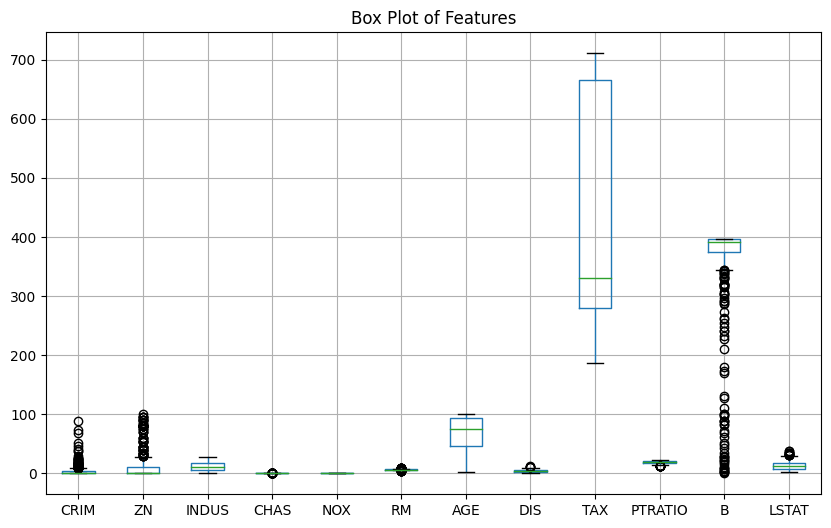

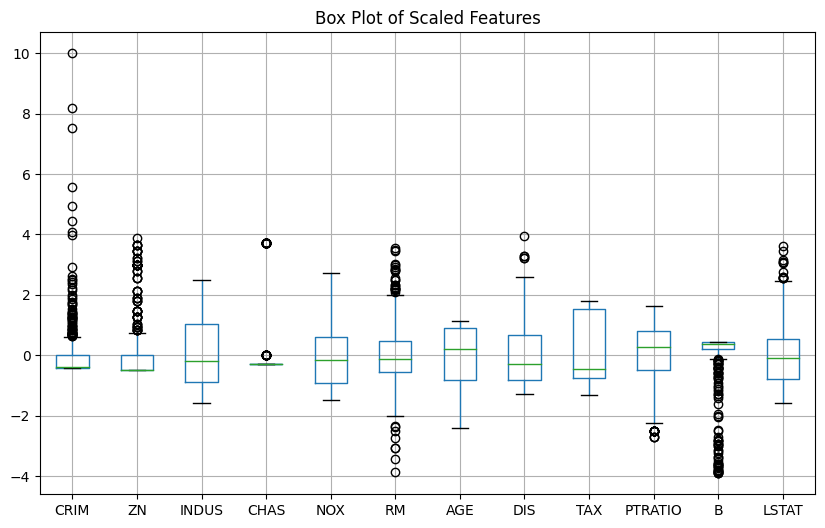

In [6]:
plt.figure(figsize=(10, 6))
dropped_df.boxplot()
plt.title('Box Plot of Features')
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dropped_df)
scaled_df = pd.DataFrame(scaled_data, columns=dropped_df.columns)
plt.figure(figsize=(10, 6))
scaled_df.boxplot()
plt.title('Box Plot of Scaled Features')
plt.show()

add polynomial features to increase model complexity!



In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(dropped_df)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(dropped_df.columns))
poly_df = poly_df.to_numpy()

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [8]:
# TODO: extract the MEDV
y = df[['MEDV']]
y = y.to_numpy()



Split the dataset into two parts such that the training set contains 80% of the samples.

In [9]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_df, y, test_size=0.2)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [10]:
# TODO: Use sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

Coefficients of the variables in the sklearn: [ 9.75732262e+00  7.93645982e-01 -1.35812965e+00  4.11965386e+01
  9.81945462e+01  1.59588220e+01  3.00033740e-01 -9.67387823e+00
 -9.06309786e-02  4.60472528e+00  2.03273986e-01  1.33089982e+00
  1.56073633e-03 -1.72076855e-02 -2.38410264e-02  9.26570392e-01
 -2.46489655e+00 -5.55283571e-02 -4.40895726e-03 -2.62456187e-01
  4.16435803e-04 -3.40625610e-01 -3.02233105e-04 -1.81862213e-03
 -4.07092985e-04 -1.68828560e-03 -1.97797834e-02 -5.99878802e-01
  2.26886344e-03  1.88834126e-04 -1.16403969e-02  3.90628426e-04
 -6.74977044e-03 -9.80820461e-04 -6.17690501e-03  3.97787406e-03
  7.17854166e-02  9.40699873e-01  1.04485423e-01  7.14597480e-03
  9.62634643e-02 -8.77480734e-04 -3.97689583e-02  1.20764033e-03
 -1.20388205e-02  1.48542214e+01 -5.76279667e+01 -1.98606738e+00
 -4.23024178e-02 -8.57817248e-01  3.37585550e-02 -4.04765044e-01
 -3.25022452e-02  1.89912471e-01 -8.17109929e+00 -9.10337110e+00
 -4.53871924e-02  8.49521755e+00  4.32471896

<BarContainer object of 90 artists>

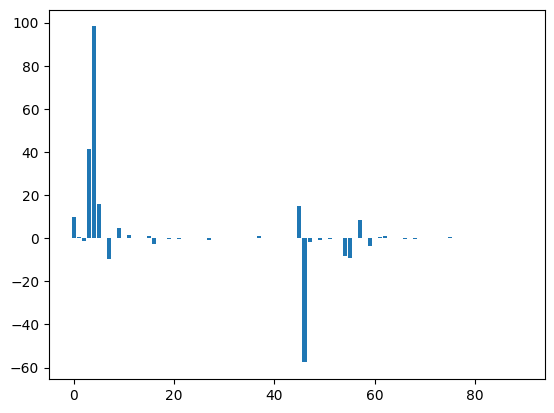

In [11]:
coefficients = linear_regressor.coef_[0]
print("Coefficients of the variables in the sklearn:", coefficients)
index = list(range(90))
plt.bar(index, coefficients)

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [12]:
# TODO: Calculate R² score and MSE on the training dataset
r2_score_train = []
r2_score_test = []
MSE_train = []
MSE_test = []

y_pred = linear_regressor.predict(X_train)

r2 = r2_score(y_train, y_pred)
print("R-squared score:", r2)

mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

r2_score_train.append(r2)
MSE_train.append(mse)

R-squared score: 0.9214104716898042
Mean Squared Error: 6.696405195834115


Predict the value of "y" for each "x" belonging to the "testing" set

In [13]:
y_pred = linear_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_score_test.append(r2)
MSE_test.append(mse)

R-squared score: 0.706238821962118
Mean Squared Error: 23.57837671845583


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [14]:
# TODO: Use Lasso from sklearn library
lasso_linear_regressor = Lasso(alpha=0.5)
lasso_linear_regressor.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+03, tolerance: 3.442e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

Coefficients of the variables: [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.05743788e-01 -0.00000000e+00
  1.67565725e-02 -0.00000000e+00  1.69663924e-02  0.00000000e+00
  1.83868847e-03 -1.18640201e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -5.62275556e-03  0.00000000e+00
 -2.96243297e-04  2.52924684e-02 -1.99920570e-04 -0.00000000e+00
 -3.63222731e-04 -2.52274224e-03  0.00000000e+00 -0.00000000e+00
  3.04414675e-02 -5.15624267e-04 -5.17443275e-03  2.64956932e-04
 -2.59626287e-03 -3.22221565e-04 -6.69355191e-04  8.27259079e-04
 -0.00000000e+00  0.00000000e+00  2.60000625e-02  5.51739072e-03
  0.00000000e+00 -6.37015028e-04 -2.54121841e-02  8.90855608e-04
 -2.25684869e-02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.35929251e-02  0.00000000e+00
 -6.39138597e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.57068906e-02 -0.0000000

<BarContainer object of 90 artists>

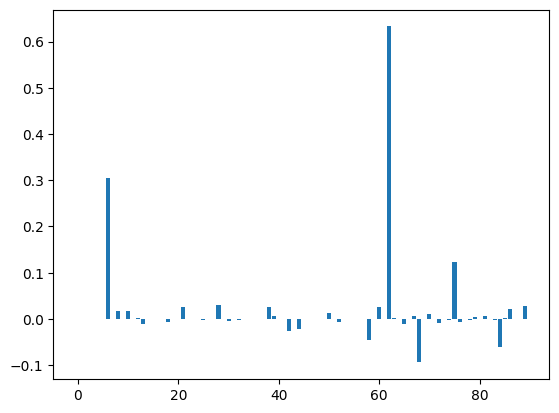

In [15]:
coefficients = lasso_linear_regressor.coef_
print("Coefficients of the variables:", coefficients)
index = list(range(90))
plt.bar(index, coefficients)

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

## Observations on weight distribution
L1 regularization (Lasso) tends to produce sparse models, meaning that it drives many coefficients to exactly zero. This is evident in the list of weights, where many weights are exactly zero. This behavior is due to the nature of L1 regularization, which penalizes the absolute value of the coefficients. Key observations include:

- **Sparsity:** Many coefficients are zero, indicating that Lasso has effectively reduced the complexity of the model by ignoring some features.
- **Feature Selection:** The zero coefficients suggest that Lasso is performing feature selection, identifying some features as less important for predicting the target variable.
- **Non-zero Coefficients:** The features with non-zero coefficients are likely to be more influential in predicting the target variable, MEDV.

## Effect of regularization parameter
The regularization parameter, often denoted as alpha or lambda in Lasso regression, controls the strength of the penalty applied to the coefficients. Its effect on sparsity can be summarized as follows:

- **Higher Alpha Values:** Increasing alpha strengthens the regularization effect, leading to more coefficients being shrunk to zero. This enhances sparsity but might also increase the risk of underfitting if alpha is too large.
- **Lower Alpha Values:** Decreasing alpha weakens the regularization effect, resulting in fewer coefficients being driven to zero. This reduces sparsity and may improve model fit, but if alpha is too small, the model might start overfitting, similar to a standard linear regression model.
- **Alpha = 0:** At alpha = 0, Lasso regression becomes equivalent to standard linear regression with no regularization. All features are likely to be retained with non-zero coefficients.
- **Alpha Selection:** The optimal value of alpha is usually selected through cross-validation, balancing the trade-off between bias (underfitting) and variance (overfitting).

Get the score value on train *dataset*


In [16]:
# TODO: Calculate R² score and MSE on the training dataset
y_pred = lasso_linear_regressor.predict(X_train)

r2 = r2_score(y_train, y_pred)
print("R-squared score:", r2)

mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

r2_score_train.append(r2)
MSE_train.append(mse)

R-squared score: 0.8957233918439937
Mean Squared Error: 8.885133117273682


Predict the value of "y" for each "x" belonging to the "testing" set

In [17]:
y_pred = lasso_linear_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_score_test.append(r2)
MSE_test.append(mse)

R-squared score: 0.7532737956682777
Mean Squared Error: 19.803172872958292


# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [18]:
# TODO: Use Ridge from sklearn library
ridge_linear_regressor = Ridge(alpha=10)
ridge_linear_regressor.fit(X_train, y_train)

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

Coefficients of the variables: [ 6.31232303e-01  1.26463235e-01  1.21466105e-02 -1.83920800e-02
  4.29443689e-02  2.15099214e-01  6.74040515e-01 -2.81249932e-01
 -2.18834371e-02 -2.51458001e-01  1.65816078e-01  9.02446677e-01
  2.48324126e-03 -1.37368060e-02 -2.61088885e-02  6.85986093e-01
 -1.02691839e+00 -5.57226511e-02 -5.08896677e-03 -5.30671805e-02
 -2.08506036e-03  1.27191526e-01 -1.48594139e-04 -7.23312822e-04
 -4.15264151e-04 -1.02272870e-03 -5.33245523e-04 -1.45248473e-01
  3.50159061e-02 -3.47512345e-04 -7.49025613e-03  3.72697712e-04
 -3.34271605e-03 -5.59418651e-04 -3.48892716e-03  4.08432812e-03
 -1.12866442e-01  6.36933295e-01  8.85005580e-02  6.28701807e-03
  3.96132948e-02 -7.46310074e-04 -5.85812019e-02 -9.08833911e-05
 -2.01588861e-02  4.60946920e-02 -1.88524615e-01 -4.99384440e-01
 -7.71450779e-03 -3.24318812e-01 -1.63705895e-03  9.51317886e-01
 -2.14474406e-02 -3.25485404e-02  5.45706588e-02  1.85677624e-01
 -9.11248670e-02  1.77029559e-01 -6.31385079e-02 -2.5962100

<BarContainer object of 90 artists>

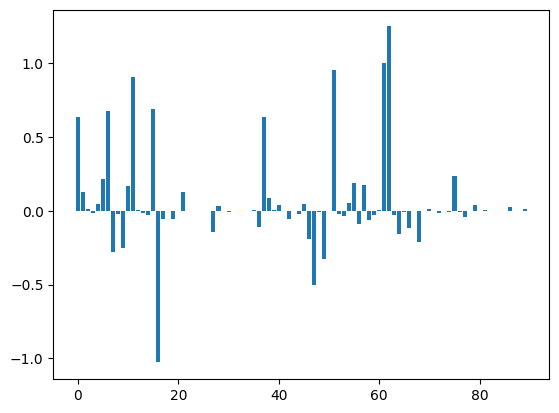

In [19]:
coefficients = ridge_linear_regressor.coef_[0]
print("Coefficients of the variables:", coefficients)
index = list(range(90))
plt.bar(index, coefficients)

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

## L1 Regularization (Lasso)
- **Coefficient Shrinkage and Sparsity:** L1 regularization can shrink coefficients all the way to zero, thus removing some features entirely. This leads to sparser solutions, which can be beneficial if you believe that many features are irrelevant or if you desire a simpler, more interpretable model.

- **Feature Selection:** Because it can zero out coefficients, L1 regularization inherently performs feature selection.

## L2 Regularization (Ridge)
- **Coefficient Shrinkage:** L2 regularization shrinks coefficients towards zero but rarely exactly to zero. This means that all features are kept but their influence is reduced. It's beneficial when all features are expected to be relevant.

- **No Feature Selection:** Unlike L1, L2 regularization does not inherently perform feature selection.

## Key Differences
- **Feature Elimination:** L1 can eliminate features completely, making it useful for feature selection, whereas L2 keeps all features but reduces their magnitude.

- **Performance with Correlated Features:** L1 may arbitrarily select one feature among a group of highly correlated features, while L2 tends to shrink coefficients of correlated features towards each other.

- **Robustness:** L1 is more robust to outliers, whereas L2 is less sensitive to scaling due to its squaring terms.

- **Computation:** L1 can be computationally more challenging due to its non-smooth nature, making optimization less straightforward compared to L2.

Get the score value on train *dataset*

In [20]:
# TODO: Calculate R² score and MSE on the training dataset
y_pred = ridge_linear_regressor.predict(X_train)

r2 = r2_score(y_train, y_pred)
print("R-squared score:", r2)

mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

r2_score_train.append(r2)
MSE_train.append(mse)

R-squared score: 0.9139298898581522
Mean Squared Error: 7.333805726444475


Predict the value of "y" for each "x" belonging to the "testing" set



In [21]:
y_pred = lasso_linear_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_score_test.append(r2)
MSE_test.append(mse)

R-squared score: 0.7532737956682777
Mean Squared Error: 19.803172872958292


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [22]:
# HINT: Use DataFrame tools
models = ['Basic Regression', 'Lasso Regression', 'Ridge Regression']
data = []
for i in range(3):
    data.append([models[i], MSE_test[i], MSE_train[i], r2_score_test[i], r2_score_train[i]])
    
metrics_pd = pd.DataFrame(data, columns=['Model', 'MSE(Test)', 'MSE(Train)', 'R2 Score(Test)', 
                                         'R2 Score(Train)'])
print(metrics_pd)

              Model  MSE(Test)  MSE(Train)  R2 Score(Test)  R2 Score(Train)
0  Basic Regression  23.578377    6.696405        0.706239         0.921410
1  Lasso Regression  19.803173    8.885133        0.753274         0.895723
2  Ridge Regression  19.803173    7.333806        0.753274         0.913930


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

## Test Data Results
For test data, both Lasso and Ridge Regression have identical MSE and R-squared scores, and they outperform the basic regression model. Lower MSE indicates better prediction accuracy, and higher R-squared indicates a better fit of the model to the variance in the data. Therefore, Lasso and Ridge Regression performed the best on the test data.

## Train Data Results
- **Basic Regression** performs best on the training data because it is not regularized and thus can fit closely to the training data, potentially capturing the noise as well.

- **Lasso Regression and Ridge Regression** introduce regularization (L1 and L2, respectively). They penalize the magnitude of the coefficients, leading to a slightly worse fit on the training data compared to basic regression but better generalization to new data (test set).

## More on Results
- **Basic Regression:** It shows the best fit on the training data but a significant drop in performance on the test data. This is a classic indication of overfitting. The model is too complex and captures noise and details in the training data that do not generalize well to unseen data.

- **Lasso and Ridge Regression:** They show a more balanced performance between the training and test data, indicating better generalization. Regularization (both L1 in Lasso and L2 in Ridge) helps in reducing overfitting by penalizing large coefficients, which makes the model less sensitive to the noise in the training data. Their performance on the test data is superior, showing they are more robust and reliable models for this dataset.

In conclusion, while basic regression shows the best results on training data due to overfitting, both Lasso and Ridge Regression provide a better trade-off between bias and variance, resulting in more reliable and generalizable models for unseen data. This emphasizes the importance of evaluating machine learning models on unseen data and the benefits of regularization techniques.